In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import * 
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.decomposition import *

In [115]:
def clean_data(path, id_col = 0, is_test = False):
    df = pd.read_csv(path, index_col=id_col)
    cabins = df["Cabin"].tolist()
    decks = [np.NaN] * len(cabins)
    rows = [np.NaN] * len(cabins)
    sides = [np.NaN] * len(cabins)
    for i in range(len(cabins)):
        try:
            decks[i] = cabins[i][0:1]
            rows[i] = float(cabins[i][2:-2])
            sides[i] = cabins[i][-1:]
        except TypeError:
            continue
    df["Decks"] = decks
    df["Rows"] = rows
    df["Sides"] = sides
    deckValues = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
    sideValues = {'P': 0, 'S': 1}
    planets = {"Earth": 0, "Mars": 1, "Europa": 2}
    TorF = {True: 1, False: 0}
    destinations = {'TRAPPIST-1e': 0,'PSO J318.5-22': 1, '55 Cancri e': 2}
    names = df.Name.values.tolist()
    surnames = []
    for name in names:
        try:
            surname = name.split(" ")[-1].strip()
        except AttributeError:
            surname = np.NaN
        surnames.append(surname)
    surname_dict = {surnames[i] : i for i in range(len(surnames))}
    df["HomePlanet"] = df["HomePlanet"].replace(planets)
    for col in ["CryoSleep", "VIP"]:
        df[col] = df[col].replace(TorF)
    if not is_test:
       df["Transported"] = df["Transported"].replace(TorF) 
    df["Destination"] = df["Destination"].replace(destinations)
    df["Name"] = surnames
    df["Name"] = df["Name"].replace(surname_dict)
    df["Decks"] = df["Decks"].replace(deckValues)
    df["Sides"] = df["Sides"].replace(sideValues)
    new_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
            'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Name', 'Decks', 'Rows', 'Sides', 'Transported'] if not is_test else ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
            'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Name', 'Decks', 'Rows', 'Sides']
    df = df[new_cols]
    df = df.drop("Cabin", axis=1)

    return df


<AxesSubplot:>

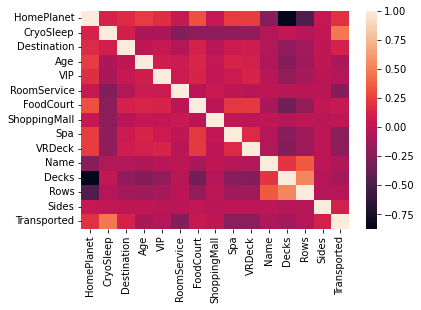

In [116]:
train_df = clean_data('data/train.csv', is_test = False)
train_df
sns.heatmap(train_df.corr())

In [117]:
test_df = clean_data('data/test.csv', is_test = True)
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Decks,Rows,Sides
PassengerId,,,,,,,,,,,,,,
0013_01,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3953,6.0,3.0,1.0
0018_01,0.0,0.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1,5.0,4.0,1.0
0019_01,2.0,1.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,0.0,1.0
0021_01,2.0,0.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,3,2.0,1.0,1.0
0023_01,0.0,0.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1604,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0.0,1.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4272,6.0,1496.0,1.0
9269_01,0.0,0.0,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,4273,NaN,NaN,NaN
9271_01,1.0,1.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4274,3.0,296.0,0.0


In [118]:
train = train_df.values

X_train = train[:, :-1]
y_train = train[:, -1]

In [119]:
# Imputation
knn_imp = KNNImputer(missing_values=np.nan, n_neighbors = 4)
X_train_imp = knn_imp.fit_transform(X_train)
X_train_imp

array([[2.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 5.00e+00, 0.00e+00, 1.00e+00],
       [2.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 6.00e+00, 1.50e+03, 1.00e+00],
       [2.00e+00, 0.00e+00, 2.00e+00, ..., 4.00e+00, 6.08e+02, 1.00e+00],
       [2.00e+00, 0.00e+00, 0.00e+00, ..., 4.00e+00, 6.08e+02, 1.00e+00]])

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_train_scaled


array([[ 1.54296399, -0.7583334 , -0.63521461, ..., -1.8717519 ,
        -1.18051703, -1.01917073],
       [-0.84661151, -0.7583334 , -0.63521461, ...,  0.3915274 ,
        -1.18051703,  0.99885812],
       [ 1.54296399, -0.7583334 , -0.63521461, ..., -2.43757172,
        -1.18051703,  0.99885812],
       ...,
       [-0.84661151, -0.7583334 , -0.63521461, ...,  0.95734722,
         1.76992266,  0.99885812],
       [ 1.54296399, -0.7583334 ,  1.82211226, ..., -0.17429242,
         0.01539452,  0.99885812],
       [ 1.54296399, -0.7583334 , -0.63521461, ..., -0.17429242,
         0.01539452,  0.99885812]])

In [121]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [122]:
explained = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
components = pca.components_
pr0 = components[-1]
vals = (X_train_scaled[1])
pr0

array([ 0.69188279, -0.1626458 ,  0.033892  ,  0.00641975, -0.0037138 ,
       -0.06263028, -0.03695874, -0.03450741, -0.04185488, -0.02207622,
        0.04110843,  0.6906543 , -0.07891897,  0.00097348])

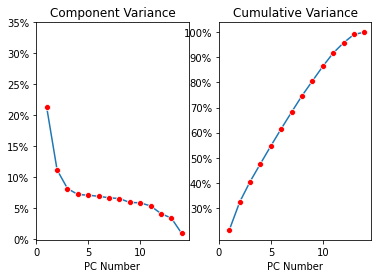

In [123]:
# plotting princomps 
dict1 = {f"PC{i}": [explained_ratio[i]] for i in range(len(explained_ratio))}
df = pd.DataFrame(dict1)

x = range(1, len(explained_ratio) + 1)
vars = explained_ratio
cum_vars = explained_ratio.cumsum()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)
sns.lineplot(x = x, y = vars*100, marker="o", markerfacecolor="red",  ax=ax1)
sns.lineplot(x = x, y = cum_vars*100, marker="o", markerfacecolor="red", ax=ax2)

ax1.set_title('Component Variance')
ax2.set_title('Cumulative Variance')

xtick_pos = range(0, 14, 5)
y1tick_range = range(0, 36, 5)
y2tick_range = range(30, 101, 10)
add_pct = lambda lst: [f"{s}%" for s in lst]

ax1.set_xticks(xtick_pos)

ax1.set_yticks(y1tick_range)
ax2.set_yticks(y2tick_range)

ax1.set_yticklabels(add_pct(y1tick_range))
ax2.set_yticklabels(add_pct(y2tick_range))

ax1.set_xlabel("PC Number")
ax2.set_xlabel("PC Number")

ax1.grid(visible=True, which="minor")
ax2.grid(visible=True, which="minor")

# ax2.set_xticks(range(1, X.shape[1]+1, 2))

plt.show()

In [124]:
train_df.Transported.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [125]:
false = train_df.iloc[:, -1][train_df.iloc[:, -1] == 0].count()
true = train_df.iloc[:, -1][train_df.iloc[:, -1] == 1].count()

print(f"Transported: {true}")
print(f"Not Transported: {false}")

Transported: 4378
Not Transported: 4315


In [126]:
rng = np.random.default_rng(seed=111)
random_guesses = rng.choice([True, False], size = (4277,), p = [0.50362361, 0.49637639])
random_guesses

array([ True,  True, False, ...,  True,  True,  True])

In [130]:
submission1_df = test_df.copy()
submission1_df["Transported"] = random_guesses
submission1_df = submission1_df.drop(submission1_df.columns[:-1], axis=1)
submission1_df.to_csv("submissions/s1.csv")